<img src="img/openflights-logo.png">

# Import librairies

In [1]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap as Basemap
import matplotlib.lines as mlines
import warnings
warnings.filterwarnings('ignore')

# Loading data

In [2]:
# download airport info data
airport_col = ['ID', 'Name', 'City', 'Country','IATA', 'ICAO', 'Lat', 'Long', 'Alt', 
              'Timezone', 'DST', 'Tz database time zone', 'type', 'source']
airport_df = pd.read_csv("https://raw.githubusercontent.com/jpatokal/openflights/master/data/airports.dat",
                        names = airport_col, index_col = 0)

# download flight routes data
route_cols = ['Airline', 'Airline ID', 'Source Airport', 'Source Airport ID',
              'Dest Airport', 'Dest Airport ID', 'Codeshare', 'Stops', 'equipment']
routes_df = pd.read_csv("https://raw.githubusercontent.com/jpatokal/openflights/master/data/routes.dat",
                       names = route_cols)

# Data preparation

In [3]:
# clean up data, change 'object' type to numeric and drops NaNs
routes_df['Source Airport ID'] = pd.to_numeric(routes_df['Source Airport ID'].astype(str), 'coerce')
routes_df['Dest Airport ID'] = pd.to_numeric(routes_df['Dest Airport ID'].astype(str), 'coerce')
routes_df = routes_df.dropna(subset=["Source Airport ID", "Dest Airport ID"]) 

# Network visualization

## Classic view

In [10]:
# extract country and then extra columns
def visualization (airport_df, routes_df):
    if (airport_df is None) or (routes_df is None):
        print ("Data cannot be retrieved and read")
    else:
        airport_eu = airport_df[(airport_df.Country == "France") & (airport_df.Lat > 25) & (airport_df.Lat < 65) & (airport_df.Long > -20) & (airport_df.Long < 40)].\
                                append(airport_df[(airport_df.Country == "Switzerland") & (airport_df.Lat > 25) & (airport_df.Lat < 65) & (airport_df.Long > -20) & (airport_df.Long < 40)]).\
                                append(airport_df[(airport_df.Country == "Germany") & (airport_df.Lat > 25) & (airport_df.Lat < 65) & (airport_df.Long > -20) & (airport_df.Long < 40)]).\
                                append(airport_df[(airport_df.Country == "Spain") & (airport_df.Lat > 34) & (airport_df.Lat < 65) & (airport_df.Long > -20) & (airport_df.Long < 40)]).\
                                append(airport_df[(airport_df.Country == "Italy") & (airport_df.Lat > 25) & (airport_df.Lat < 65) & (airport_df.Long > -20) & (airport_df.Long < 40)]).\
                                append(airport_df[(airport_df.Country == "Poland") & (airport_df.Lat > 25) & (airport_df.Lat < 65) & (airport_df.Long > -20) & (airport_df.Long < 40)]).\
                                append(airport_df[(airport_df.Country == "United Kingdom") & (airport_df.Lat > 25) & (airport_df.Lat < 65) & (airport_df.Long > -20) & (airport_df.Long < 40)]).\
                                append(airport_df[(airport_df.Country == "Czech Republic") & (airport_df.Lat > 25) & (airport_df.Lat < 65) & (airport_df.Long > -20) & (airport_df.Long < 40)]).\
                                append(airport_df[(airport_df.Country == "Austria") & (airport_df.Lat > 25) & (airport_df.Lat < 65) & (airport_df.Long > -20) & (airport_df.Long < 40)]).\
                                append(airport_df[(airport_df.Country == "Norway") & (airport_df.Lat > 25) & (airport_df.Lat < 65) & (airport_df.Long > -20) & (airport_df.Long < 40)]).\
                                append(airport_df[(airport_df.Country == "Sweden") & (airport_df.Lat > 25) & (airport_df.Lat < 65) & (airport_df.Long > -20) & (airport_df.Long < 40)]).\
                                append(airport_df[(airport_df.Country == "Finland") & (airport_df.Lat > 25) & (airport_df.Lat < 65) & (airport_df.Long > -20) & (airport_df.Long < 40)]).\
                                append(airport_df[(airport_df.Country == "Slovakia") & (airport_df.Lat > 25) & (airport_df.Lat < 65) & (airport_df.Long > -20) & (airport_df.Long < 40)]).\
                                append(airport_df[(airport_df.Country == "Ireland") & (airport_df.Lat > 25) & (airport_df.Lat < 65) & (airport_df.Long > -20) & (airport_df.Long < 40)]).\
                                append(airport_df[(airport_df.Country == "Portugal") & (airport_df.Lat > 34) & (airport_df.Lat < 65) & (airport_df.Long > -20) & (airport_df.Long < 40)]).\
                                append(airport_df[(airport_df.Country == "Hungary") & (airport_df.Lat > 25) & (airport_df.Lat < 65) & (airport_df.Long > -20) & (airport_df.Long < 40)]).\
                                append(airport_df[(airport_df.Country == "Netherlands") & (airport_df.Lat > 25) & (airport_df.Lat < 65) & (airport_df.Long > -20) & (airport_df.Long < 40)]).\
                                append(airport_df[(airport_df.Country == "Belgium") & (airport_df.Lat > 25) & (airport_df.Lat < 65) & (airport_df.Long > -20) & (airport_df.Long < 40)]).\
                                append(airport_df[(airport_df.Country == "Luxembourg") & (airport_df.Lat > 25) & (airport_df.Lat < 65) & (airport_df.Long > -20) & (airport_df.Long < 40)]).\
                                append(airport_df[(airport_df.Country == "Slovenia") & (airport_df.Lat > 25) & (airport_df.Lat < 65) & (airport_df.Long > -20) & (airport_df.Long < 40)]).\
                                append(airport_df[(airport_df.Country == "Croatia") & (airport_df.Lat > 25) & (airport_df.Lat < 65) & (airport_df.Long > -20) & (airport_df.Long < 40)]).\
                                append(airport_df[(airport_df.Country == "Denmark") & (airport_df.Lat > 25) & (airport_df.Lat < 65) & (airport_df.Long > -20) & (airport_df.Long < 40)]).\
                                append(airport_df[(airport_df.Country == "Latvia") & (airport_df.Lat > 25) & (airport_df.Lat < 65) & (airport_df.Long > -20) & (airport_df.Long < 40)]).\
                                append(airport_df[(airport_df.Country == "Estonia") & (airport_df.Lat > 25) & (airport_df.Lat < 65) & (airport_df.Long > -20) & (airport_df.Long < 40)]).\
                                append(airport_df[(airport_df.Country == "Lithuania") & (airport_df.Lat > 25) & (airport_df.Lat < 65) & (airport_df.Long > -20) & (airport_df.Long < 40)]).\
                                append(airport_df[(airport_df.Country == "Greece") & (airport_df.Lat > 25) & (airport_df.Lat < 65) & (airport_df.Long > -20) & (airport_df.Long < 40)]).\
                                append(airport_df[(airport_df.Country == "Malta") & (airport_df.Lat > 25) & (airport_df.Lat < 65) & (airport_df.Long > -20) & (airport_df.Long < 40)]).\
                                append(airport_df[(airport_df.Country == "Romania") & (airport_df.Lat > 25) & (airport_df.Lat < 65) & (airport_df.Long > -20) & (airport_df.Long < 40)]).\
                                append(airport_df[(airport_df.Country == "Bulgaria") & (airport_df.Lat > 25) & (airport_df.Lat < 65) & (airport_df.Long > -20) & (airport_df.Long < 40)])
        eu_airport_ix = airport_eu.index.values
        routes_eu = routes_df[(routes_df['Source Airport ID'].isin(eu_airport_ix)) &
                        (routes_df['Dest Airport ID'].isin(eu_airport_ix))] #extract routes that flyies from AND to USA
        routes_eu =  pd.DataFrame(routes_eu.groupby(['Source Airport', 'Dest Airport']).size().reset_index(name='counts'))

        # to find number of flights in and out of an airport
        # it is similar to find number of rows in which each airport occur in either one of the 2 columns
        counts = routes_eu['Source Airport'].append(routes_eu.loc[routes_eu['Source Airport'] != routes_eu['Dest Airport'], 'Dest Airport']).value_counts()
        
        # create a data frame of position based on names in count
        counts = pd.DataFrame({'IATA': counts.index, 'total_flight': counts})
        pos_data = counts.merge(airport_eu, on = 'IATA')

        # Create graph
        graph = nx.from_pandas_edgelist(routes_eu, source = 'Source Airport', target = 'Dest Airport',
                        edge_attr = 'counts',create_using = nx.DiGraph())

        # Set up base map
        plt.figure(figsize=(15,20))
        m = Basemap(
                projection='merc',
                llcrnrlon=-15,
                llcrnrlat=31,
                urcrnrlon=34,
                urcrnrlat=64,
                lat_ts=0,
                resolution='l',
                suppress_ticks=True)

        # import long lat as m attribute
        mx, my = m(pos_data['Long'].values, pos_data['Lat'].values)
        pos = {}
        for count, elem in enumerate (pos_data['IATA']):
            pos[elem] = (mx[count], my[count])

        # draw nodes and edges and overly on basemap
        nx.draw_networkx_nodes(G = graph, pos = pos, nodelist = [x for x in graph.nodes() if counts['total_flight'][x] >= 100],
                               node_color = 'r', alpha = 0.8,
                               node_size = [counts['total_flight'][x]*4  for x in graph.nodes() if counts['total_flight'][x] >= 100])

        nx.draw_networkx_labels(G = graph, pos = pos, font_size=10,
                                labels = {x:x for x in graph.nodes() if counts['total_flight'][x] >= 100})

        nx.draw_networkx_nodes(G = graph, pos = pos, nodelist = [x for x in graph.nodes() if counts['total_flight'][x] < 100],
                               node_color = 'b', alpha = 0.6,
                               node_size = [counts['total_flight'][x]*4  for x in graph.nodes() if counts['total_flight'][x] < 100])

        nx.draw_networkx_edges(G = graph, pos = pos, edge_color = 'green', width = routes_eu['counts']*0.75, 
                               alpha=0.06, arrows = False)

        m.drawcountries(linewidth = 3)
        m.drawstates(linewidth = 0.2)
        m.drawcoastlines(linewidth=1)
        m.fillcontinents(alpha = 0.3)
        line1 = mlines.Line2D(range(1), range(1), color="white", marker='o', markerfacecolor="red")
        line2 = mlines.Line2D(range(1), range(1), color="white", marker='o',markerfacecolor="blue")
        line3 = mlines.Line2D(range(1), range(1), color="green", marker='', markerfacecolor="green")
        plt.legend((line1, line2, line3), ('Large airports > 100 routes', 'Smaller airports', 'Routes'),
                   loc=4, fontsize = 'xx-large')
        plt.title("Network graph of flight routes in Europe", fontsize = 30)
        #m.bluemarble()
        #m.shadedrelief()
        plt.tight_layout()
        plt.savefig("img/map.png", format = "png", dpi = 200)
        plt.show()
        print ("successful visualization")

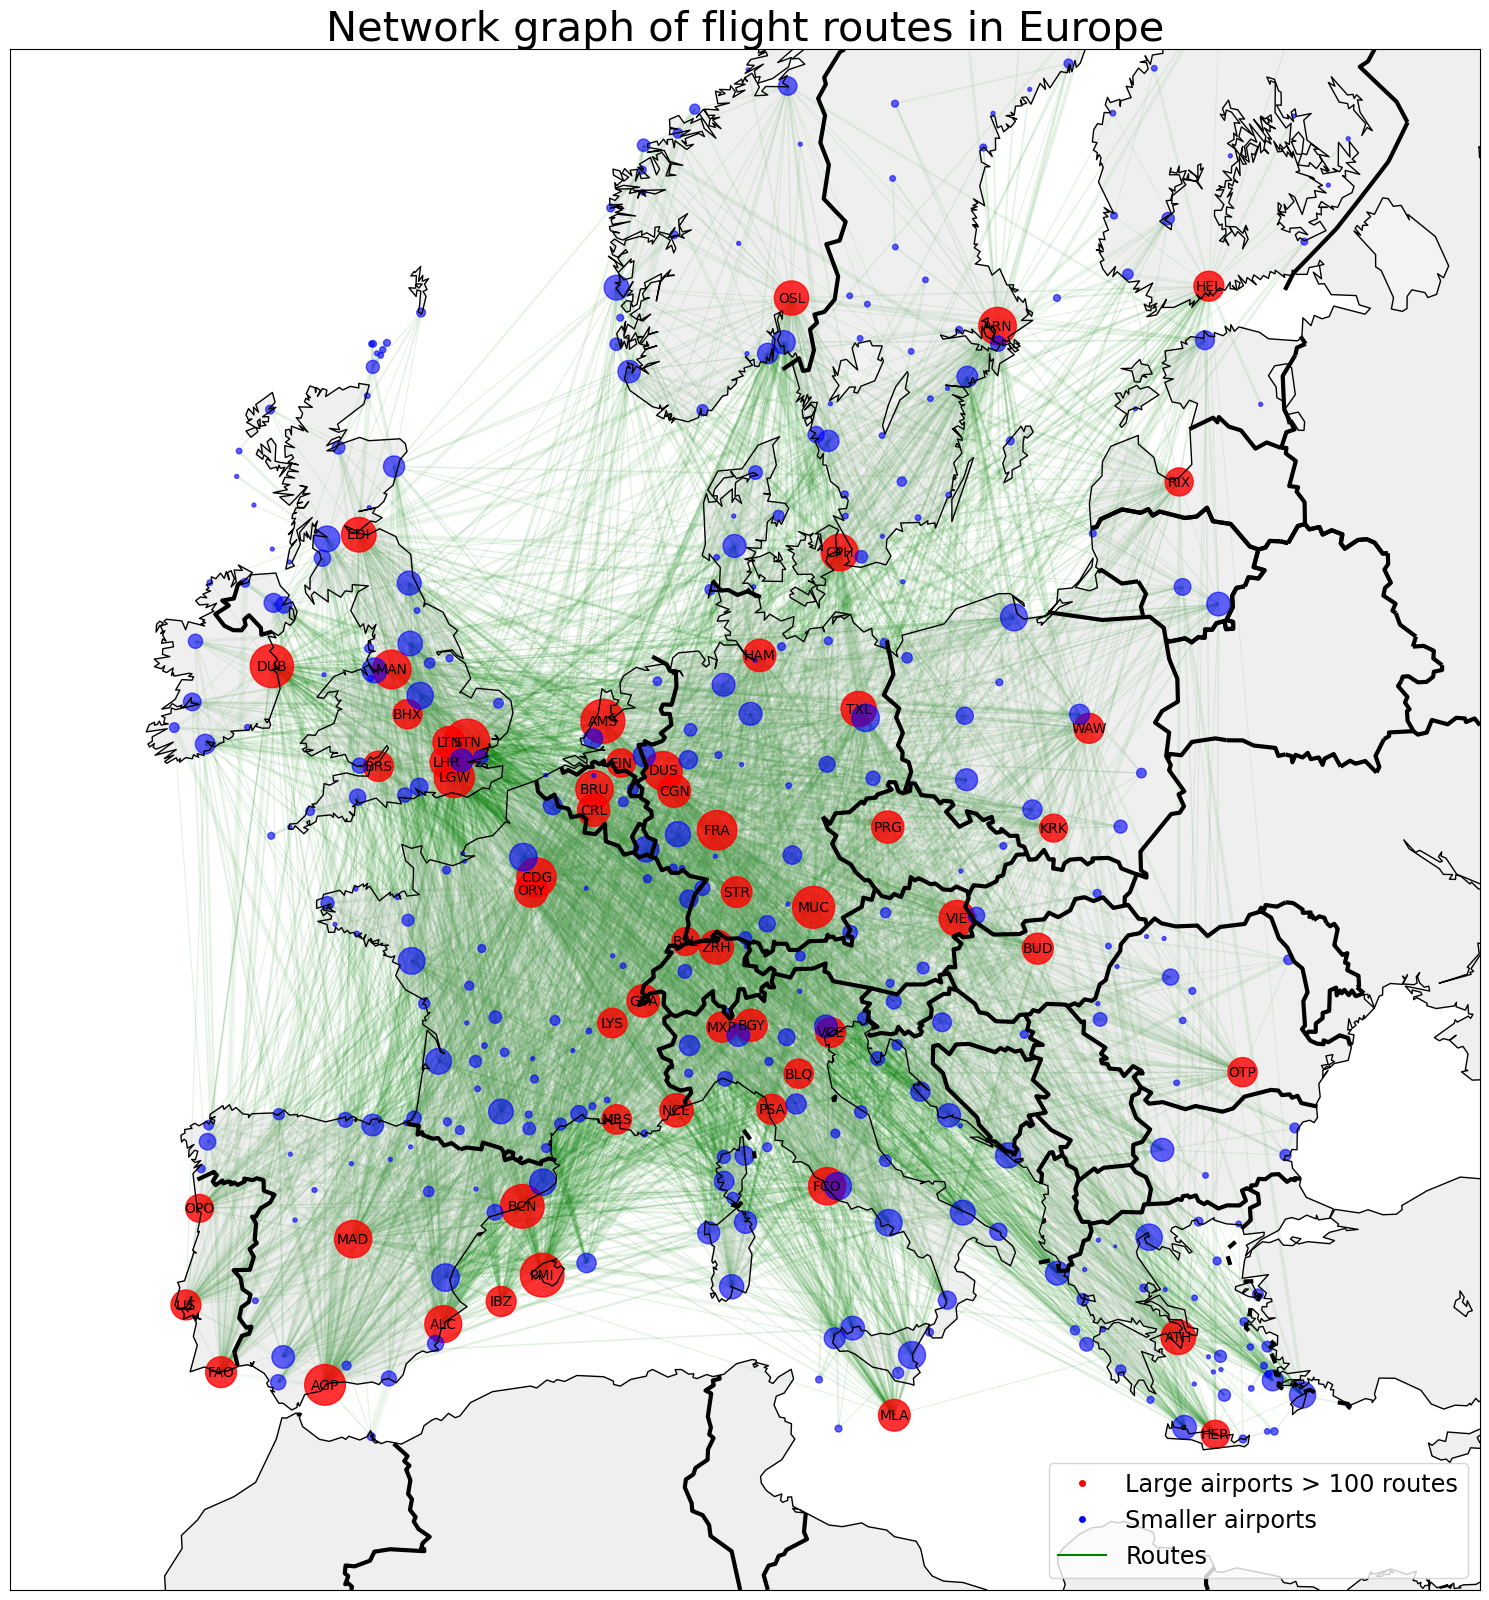

successful visualization


In [11]:
visualization(airport_df, routes_df)

## Satellite view

In [6]:
# extract country and then extra columns
def visualization (airport_df, routes_df):
    if (airport_df is None) or (routes_df is None):
        print ("Data cannot be retrieved and read")
    else:
        airport_eu = airport_df[(airport_df.Country == "France") & (airport_df.Lat > 25) & (airport_df.Lat < 65) & (airport_df.Long > -20) & (airport_df.Long < 40)].\
                                append(airport_df[(airport_df.Country == "Switzerland") & (airport_df.Lat > 25) & (airport_df.Lat < 65) & (airport_df.Long > -20) & (airport_df.Long < 40)]).\
                                append(airport_df[(airport_df.Country == "Germany") & (airport_df.Lat > 25) & (airport_df.Lat < 65) & (airport_df.Long > -20) & (airport_df.Long < 40)]).\
                                append(airport_df[(airport_df.Country == "Spain") & (airport_df.Lat > 34) & (airport_df.Lat < 65) & (airport_df.Long > -20) & (airport_df.Long < 40)]).\
                                append(airport_df[(airport_df.Country == "Italy") & (airport_df.Lat > 25) & (airport_df.Lat < 65) & (airport_df.Long > -20) & (airport_df.Long < 40)]).\
                                append(airport_df[(airport_df.Country == "Poland") & (airport_df.Lat > 25) & (airport_df.Lat < 65) & (airport_df.Long > -20) & (airport_df.Long < 40)]).\
                                append(airport_df[(airport_df.Country == "United Kingdom") & (airport_df.Lat > 25) & (airport_df.Lat < 65) & (airport_df.Long > -20) & (airport_df.Long < 40)]).\
                                append(airport_df[(airport_df.Country == "Czech Republic") & (airport_df.Lat > 25) & (airport_df.Lat < 65) & (airport_df.Long > -20) & (airport_df.Long < 40)]).\
                                append(airport_df[(airport_df.Country == "Austria") & (airport_df.Lat > 25) & (airport_df.Lat < 65) & (airport_df.Long > -20) & (airport_df.Long < 40)]).\
                                append(airport_df[(airport_df.Country == "Norway") & (airport_df.Lat > 25) & (airport_df.Lat < 65) & (airport_df.Long > -20) & (airport_df.Long < 40)]).\
                                append(airport_df[(airport_df.Country == "Sweden") & (airport_df.Lat > 25) & (airport_df.Lat < 65) & (airport_df.Long > -20) & (airport_df.Long < 40)]).\
                                append(airport_df[(airport_df.Country == "Finland") & (airport_df.Lat > 25) & (airport_df.Lat < 65) & (airport_df.Long > -20) & (airport_df.Long < 40)]).\
                                append(airport_df[(airport_df.Country == "Slovakia") & (airport_df.Lat > 25) & (airport_df.Lat < 65) & (airport_df.Long > -20) & (airport_df.Long < 40)]).\
                                append(airport_df[(airport_df.Country == "Ireland") & (airport_df.Lat > 25) & (airport_df.Lat < 65) & (airport_df.Long > -20) & (airport_df.Long < 40)]).\
                                append(airport_df[(airport_df.Country == "Portugal") & (airport_df.Lat > 34) & (airport_df.Lat < 65) & (airport_df.Long > -20) & (airport_df.Long < 40)]).\
                                append(airport_df[(airport_df.Country == "Hungary") & (airport_df.Lat > 25) & (airport_df.Lat < 65) & (airport_df.Long > -20) & (airport_df.Long < 40)]).\
                                append(airport_df[(airport_df.Country == "Netherlands") & (airport_df.Lat > 25) & (airport_df.Lat < 65) & (airport_df.Long > -20) & (airport_df.Long < 40)]).\
                                append(airport_df[(airport_df.Country == "Belgium") & (airport_df.Lat > 25) & (airport_df.Lat < 65) & (airport_df.Long > -20) & (airport_df.Long < 40)]).\
                                append(airport_df[(airport_df.Country == "Luxembourg") & (airport_df.Lat > 25) & (airport_df.Lat < 65) & (airport_df.Long > -20) & (airport_df.Long < 40)]).\
                                append(airport_df[(airport_df.Country == "Slovenia") & (airport_df.Lat > 25) & (airport_df.Lat < 65) & (airport_df.Long > -20) & (airport_df.Long < 40)]).\
                                append(airport_df[(airport_df.Country == "Croatia") & (airport_df.Lat > 25) & (airport_df.Lat < 65) & (airport_df.Long > -20) & (airport_df.Long < 40)]).\
                                append(airport_df[(airport_df.Country == "Denmark") & (airport_df.Lat > 25) & (airport_df.Lat < 65) & (airport_df.Long > -20) & (airport_df.Long < 40)]).\
                                append(airport_df[(airport_df.Country == "Latvia") & (airport_df.Lat > 25) & (airport_df.Lat < 65) & (airport_df.Long > -20) & (airport_df.Long < 40)]).\
                                append(airport_df[(airport_df.Country == "Estonia") & (airport_df.Lat > 25) & (airport_df.Lat < 65) & (airport_df.Long > -20) & (airport_df.Long < 40)]).\
                                append(airport_df[(airport_df.Country == "Lithuania") & (airport_df.Lat > 25) & (airport_df.Lat < 65) & (airport_df.Long > -20) & (airport_df.Long < 40)]).\
                                append(airport_df[(airport_df.Country == "Greece") & (airport_df.Lat > 25) & (airport_df.Lat < 65) & (airport_df.Long > -20) & (airport_df.Long < 40)]).\
                                append(airport_df[(airport_df.Country == "Malta") & (airport_df.Lat > 25) & (airport_df.Lat < 65) & (airport_df.Long > -20) & (airport_df.Long < 40)]).\
                                append(airport_df[(airport_df.Country == "Romania") & (airport_df.Lat > 25) & (airport_df.Lat < 65) & (airport_df.Long > -20) & (airport_df.Long < 40)]).\
                                append(airport_df[(airport_df.Country == "Bulgaria") & (airport_df.Lat > 25) & (airport_df.Lat < 65) & (airport_df.Long > -20) & (airport_df.Long < 40)])
        eu_airport_ix = airport_eu.index.values
        routes_eu = routes_df[(routes_df['Source Airport ID'].isin(eu_airport_ix)) &
                        (routes_df['Dest Airport ID'].isin(eu_airport_ix))] #extract routes that flyies from AND to USA
        routes_eu =  pd.DataFrame(routes_eu.groupby(['Source Airport', 'Dest Airport']).size().reset_index(name='counts'))

        # to find number of flights in and out of an airport
        # it is similar to find number of rows in which each airport occur in either one of the 2 columns
        counts = routes_eu['Source Airport'].append(routes_eu.loc[routes_eu['Source Airport'] != routes_eu['Dest Airport'], 'Dest Airport']).value_counts()
        
        # create a data frame of position based on names in count
        counts = pd.DataFrame({'IATA': counts.index, 'total_flight': counts})
        pos_data = counts.merge(airport_eu, on = 'IATA')

        # Create graph
        graph = nx.from_pandas_edgelist(routes_eu, source = 'Source Airport', target = 'Dest Airport',
                        edge_attr = 'counts',create_using = nx.DiGraph())

        # Set up base map
        plt.figure(figsize=(15,20))
        m = Basemap(
                projection='merc',
                llcrnrlon=-15,
                llcrnrlat=31,
                urcrnrlon=34,
                urcrnrlat=64,
                lat_ts=0,
                resolution='l',
                suppress_ticks=True)

        # import long lat as m attribute
        mx, my = m(pos_data['Long'].values, pos_data['Lat'].values)
        pos = {}
        for count, elem in enumerate (pos_data['IATA']):
            pos[elem] = (mx[count], my[count])

        # draw nodes and edges and overly on basemap
        nx.draw_networkx_nodes(G = graph, pos = pos, nodelist = [x for x in graph.nodes() if counts['total_flight'][x] >= 100],
                               node_color = 'r', alpha = 0.8,
                               node_size = [counts['total_flight'][x]*4  for x in graph.nodes() if counts['total_flight'][x] >= 100])

        nx.draw_networkx_labels(G = graph, pos = pos, font_size=10,
                                labels = {x:x for x in graph.nodes() if counts['total_flight'][x] >= 100})

        nx.draw_networkx_nodes(G = graph, pos = pos, nodelist = [x for x in graph.nodes() if counts['total_flight'][x] < 100],
                               node_color = 'b', alpha = 0.6,
                               node_size = [counts['total_flight'][x]*4  for x in graph.nodes() if counts['total_flight'][x] < 100])

        nx.draw_networkx_edges(G = graph, pos = pos, edge_color = 'orange', width = routes_eu['counts']*0.75, 
                               alpha=0.06, arrows = False)

        m.drawcountries(linewidth = 3)
        m.drawstates(linewidth = 0.2)
        m.drawcoastlines(linewidth=1)
        m.fillcontinents(alpha = 0.3)
        line1 = mlines.Line2D(range(1), range(1), color="white", marker='o', markerfacecolor="red")
        line2 = mlines.Line2D(range(1), range(1), color="white", marker='o',markerfacecolor="blue")
        line3 = mlines.Line2D(range(1), range(1), color="orange", marker='',markerfacecolor="orange")
        plt.legend((line1, line2, line3), ('Large airports > 100 routes', 'Smaller airports', 'Routes'),
                   loc=4, fontsize = 'xx-large')
        plt.title("Network graph of flight routes in Europe", fontsize = 30)
        m.bluemarble()
        plt.tight_layout()
        plt.savefig("img/map2.png", format = "png", dpi = 200)
        plt.show()
        print ("successful visualization")

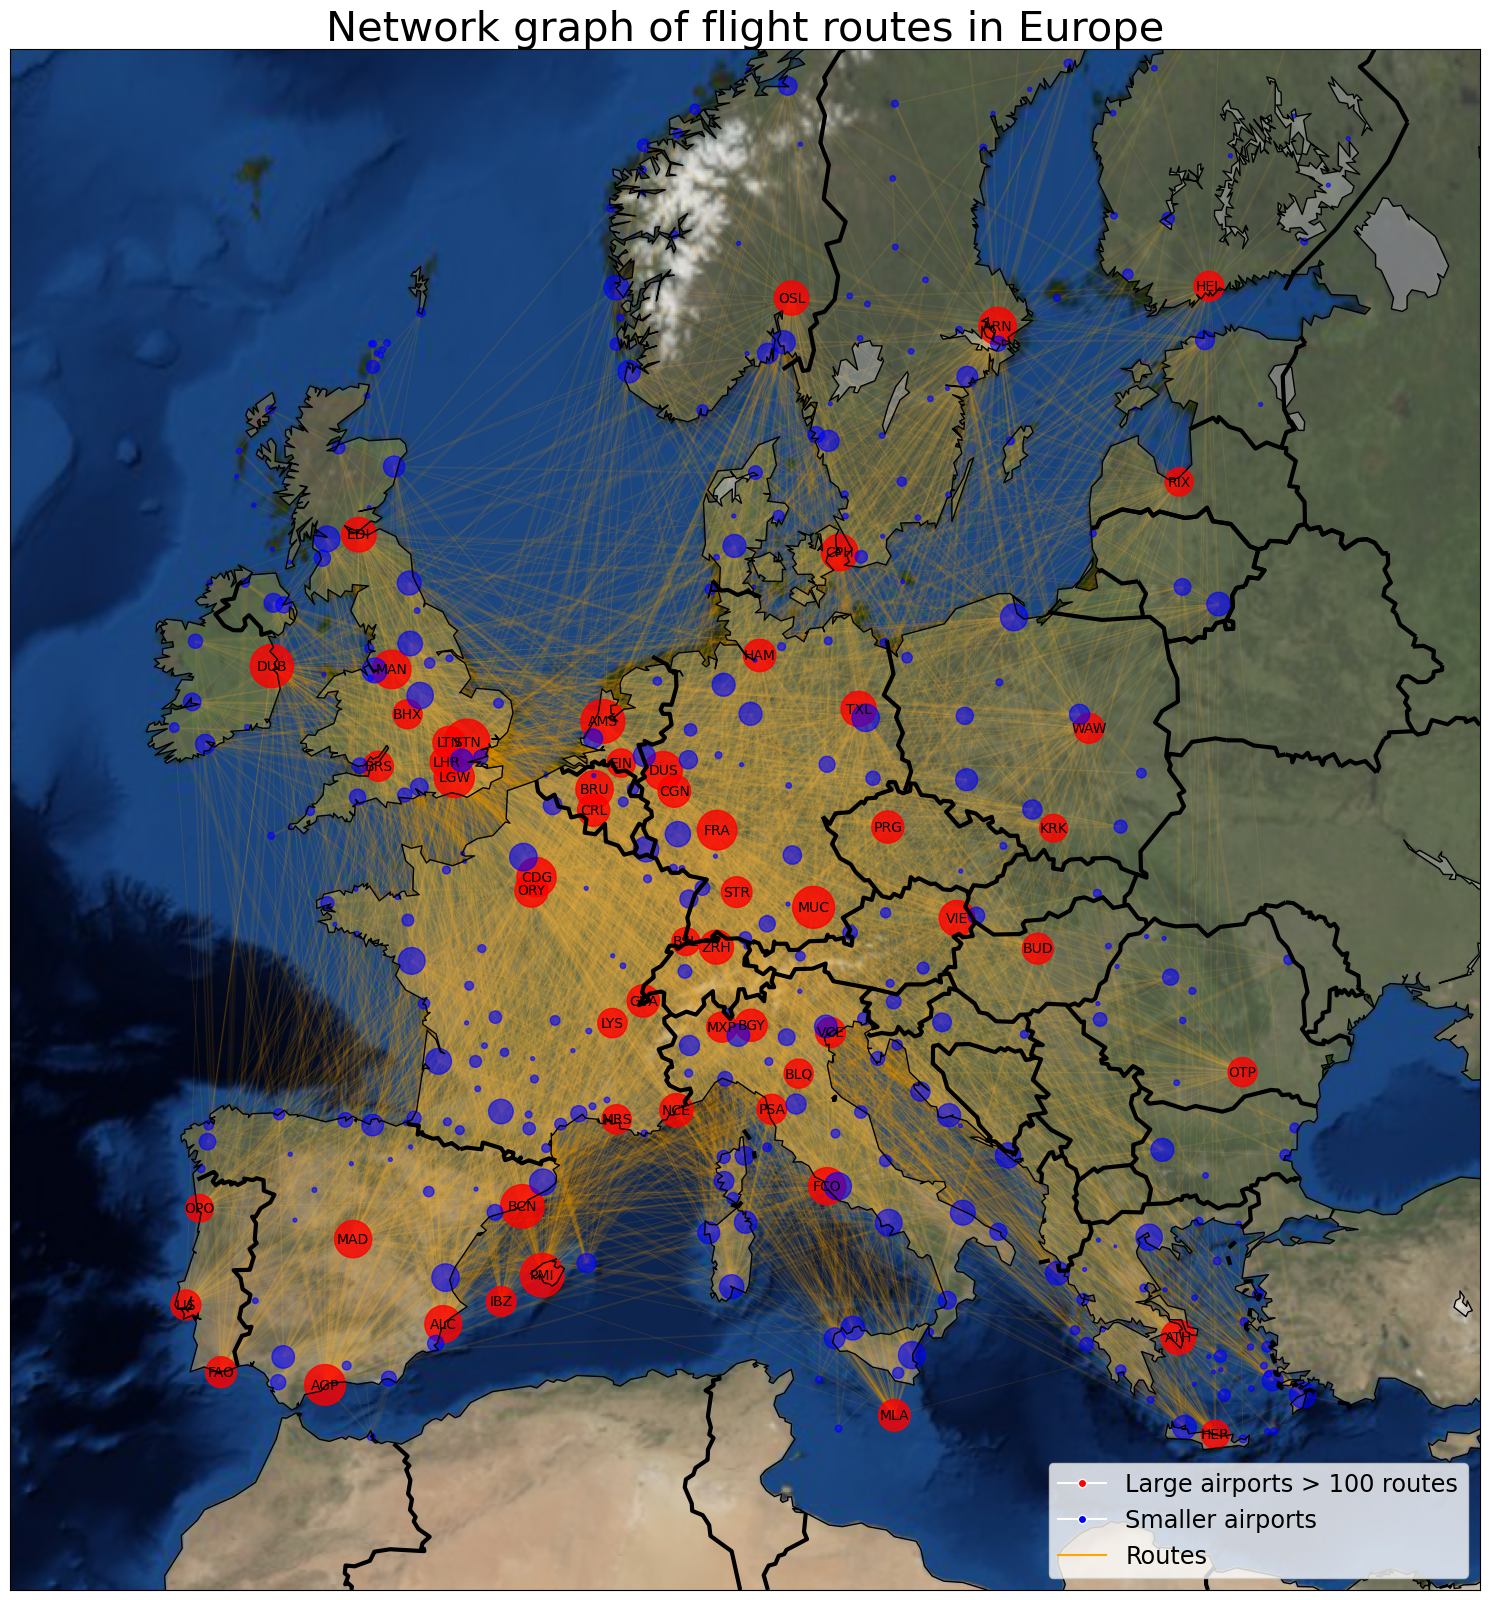

successful visualization


In [7]:
visualization(airport_df, routes_df)